In [2]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [8]:
hotel = pd.read_csv("INNHotelsGroup.csv")
data = hotel.copy()

In [9]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [10]:
data.shape

(36275, 19)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [12]:
data.duplicated().sum()

0

In [13]:
data = data.drop(["Booking_ID"], axis=1)

In [15]:
data.describe()
'''
There is an average of 2 adults  in the hotel room 
each guest(s) stay for around 2 week nights 
The maximum number of children was 10 while the least was 0 


'''

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [158]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

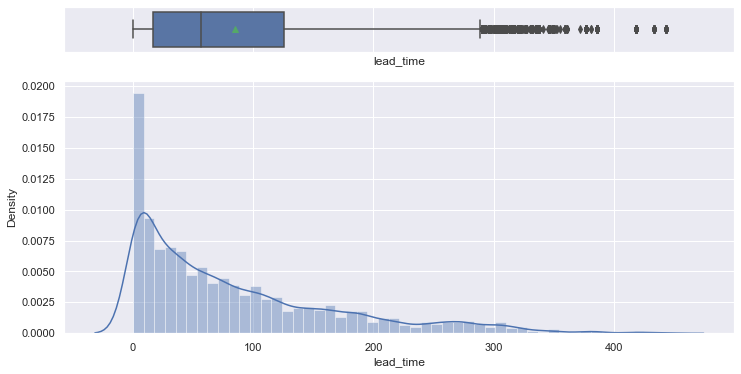

'\nThe following two graphs show the variable "lead_time" at a glance.\nThe first graph shows us that there are a lot of outliers in the data (dots outside boxplot)\nThe second graph shows us the likelyhood of out variable to take on different values \n\n'

In [159]:
hist_box(data,'lead_time')
'''
The following two graphs show the variable "lead_time" at a glance.
The first graph shows us that there are a lot of outliers in the data (dots outside boxplot)
The second graph shows us the likelyhood of out variable to take on different values

We can also see that the graph is squewed to the left 

'''

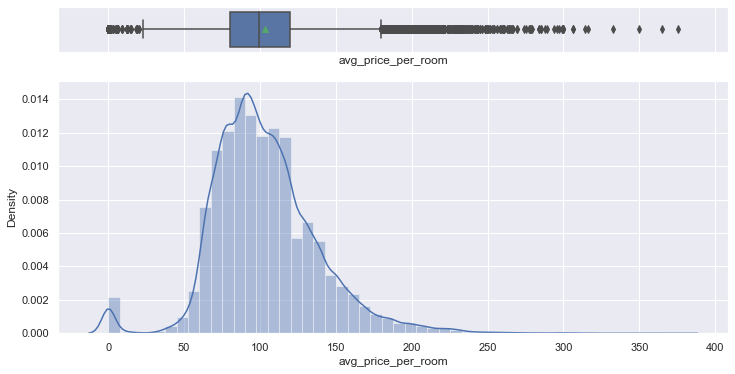

In [160]:
hist_box(data,"avg_price_per_room")
'''
There is a normal distribution in the second graph(bell curve)
The average price for a room is around 100 dollars 

'''

In [47]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [48]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [49]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [51]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

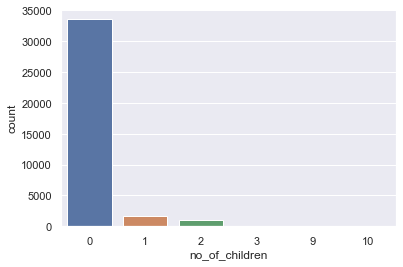

In [52]:
sns.countplot(data['no_of_children'])
plt.show()

In [53]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

In [54]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

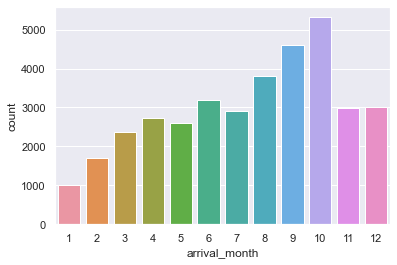

In [55]:
sns.countplot(data["arrival_month"])
plt.show()

In [57]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

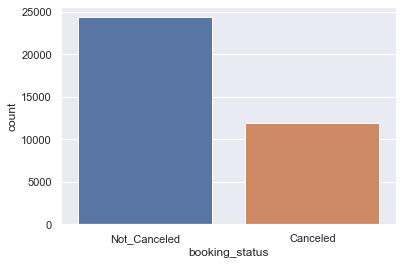

In [58]:
sns.countplot(data["booking_status"])
plt.show()

In [59]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [60]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

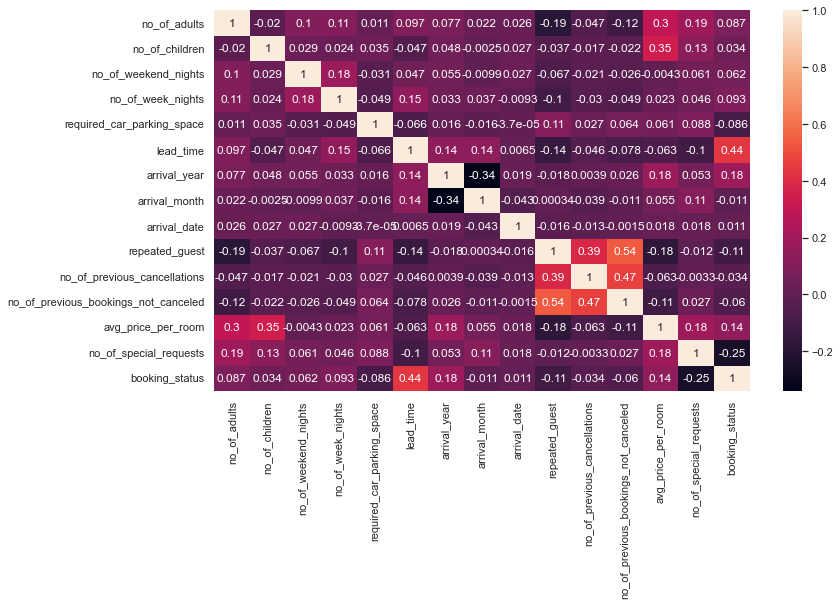

In [67]:
# Remove _________ and complete the code

cols_list = data.select_dtypes(include=np.number).columns.tolist()
corr_matrix = data.iloc[:,0:19].corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix,annot = True)
plt.show()
'''
As you can see I made a variable to hold the correlation matrix.
This variable just makes a table for all 19 colmuns and their correlation percentages 

I can clearly see from the heatmap that booking status and lead time are positively correlated
On top of that the previous bookings not cancelled and repeated guest colmuns are correlated 
'''

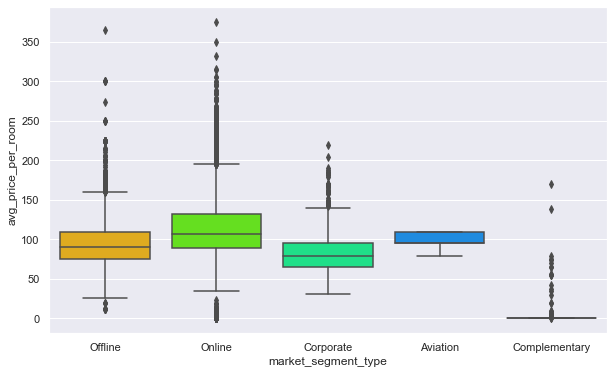

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

In [69]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

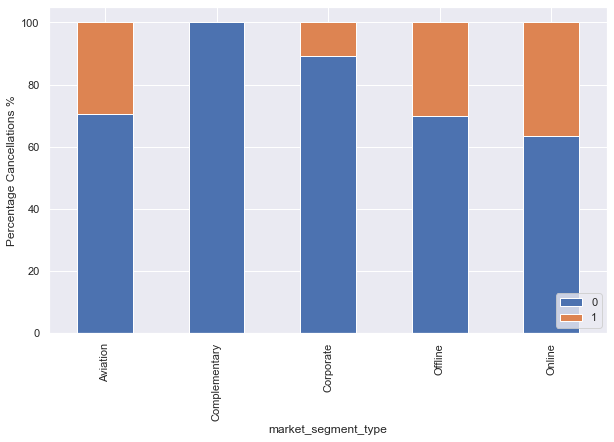

In [163]:
# Remove _________ and complete the code
stacked_barplot(data,'market_segment_type','booking_status')

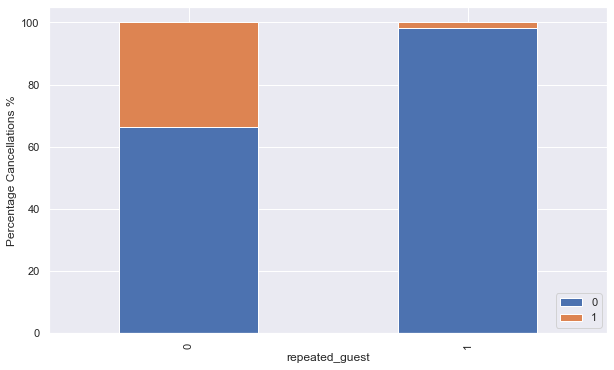

In [165]:
# Remove _________ and complete the code
stacked_barplot(data, "repeated_guest", "booking_status")

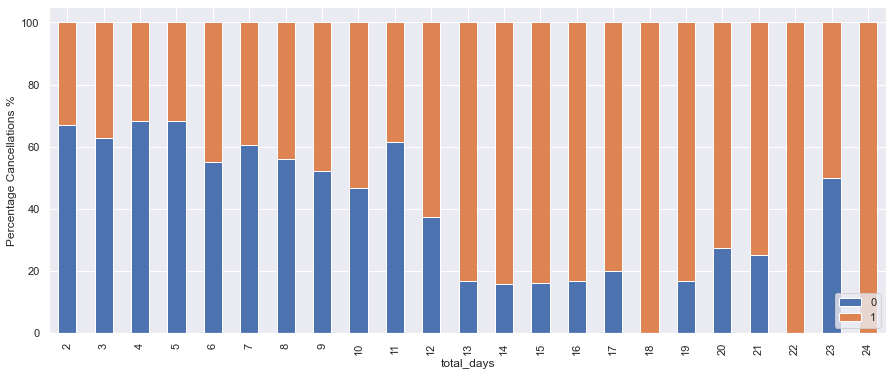

In [166]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

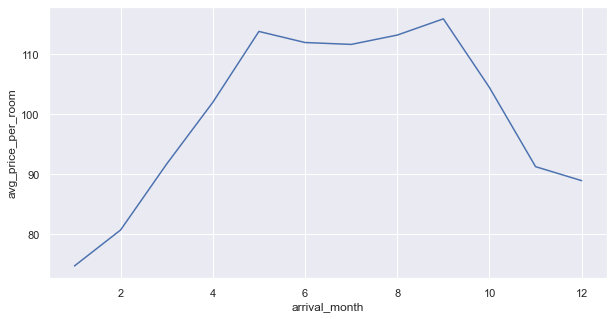

In [167]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

In [168]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)


In [170]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


In [171]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17073
           1       0.73      0.59      0.65      8319

    accuracy                           0.79     25392
   macro avg       0.77      0.74      0.75     25392
weighted avg       0.79      0.79      0.79     25392



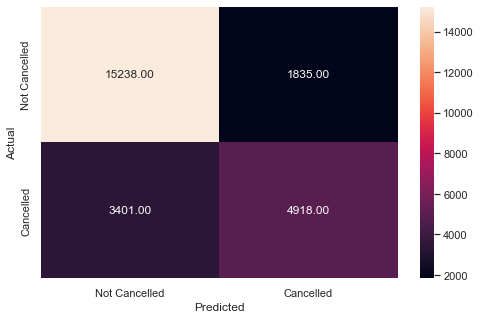

In [172]:
# Remove _________ and complete the code
lg=LogisticRegression()
lg.fit(X_train,y_train)
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      7317
           1       0.72      0.58      0.64      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.78      0.79      0.78     10883



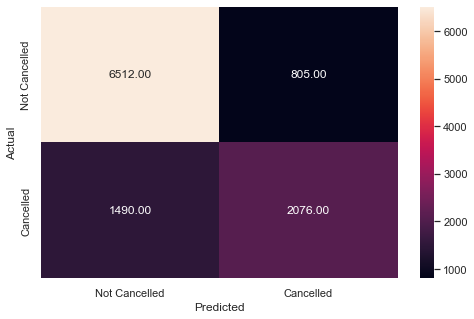

In [173]:
# Remove _________ and complete the code

# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

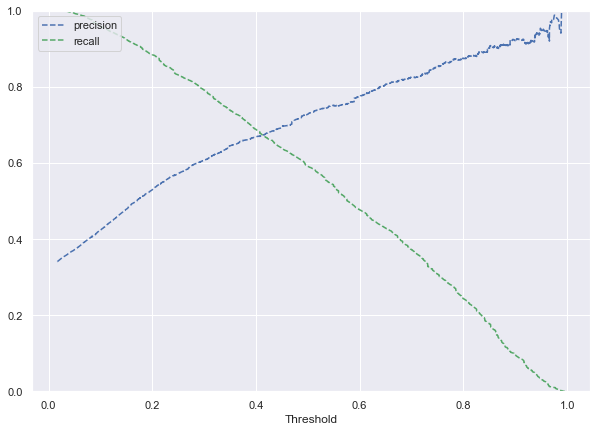

In [105]:
# Remove _________ and complete the code

# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [106]:
optimal_threshold = 0.41

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17073
           1       0.67      0.68      0.67      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



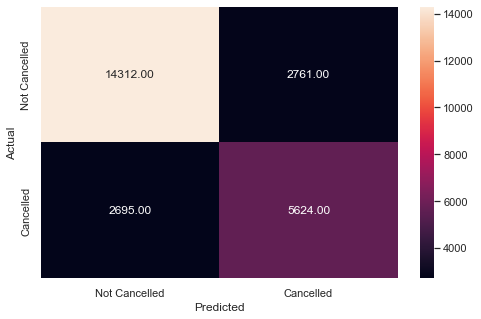

In [108]:
# Remove _________ and complete the code

# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.67      0.67      3566

    accuracy                           0.78     10883
   macro avg       0.75      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



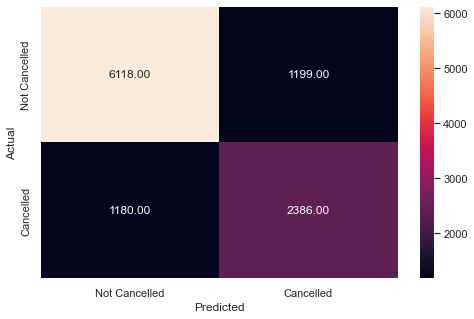

In [109]:
# Remove _________ and complete the code

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)


In [186]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [187]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train, y = y_train)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     17073
           1       0.00      0.00      0.00      8319

    accuracy                           0.67     25392
   macro avg       0.34      0.50      0.40     25392
weighted avg       0.45      0.67      0.54     25392



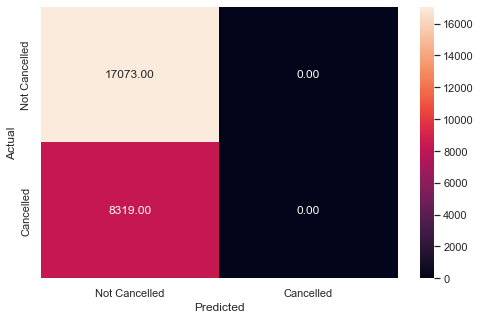

In [188]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      7317
           1       0.00      0.00      0.00      3566

    accuracy                           0.67     10883
   macro avg       0.34      0.50      0.40     10883
weighted avg       0.45      0.67      0.54     10883



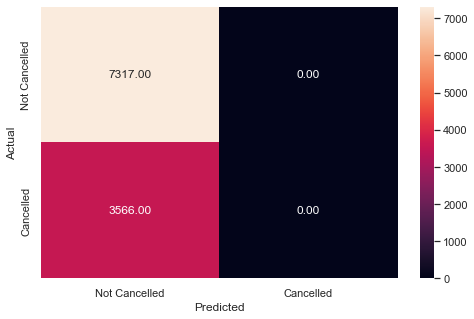

In [189]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

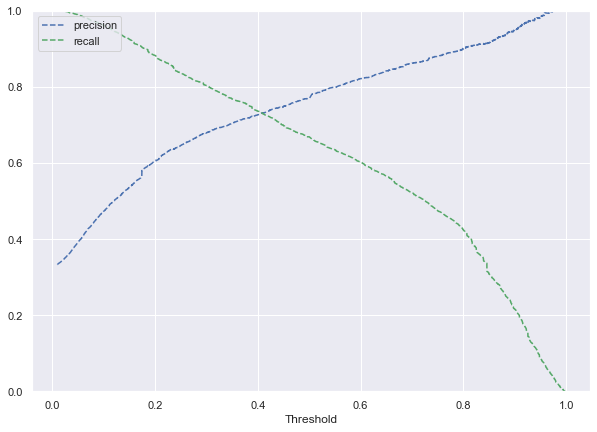

In [182]:
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()


In [117]:
optimal_threshold_svm=0.41

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17073
           1       0.67      0.68      0.67      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



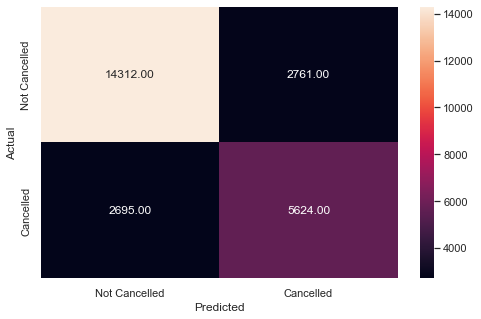

In [183]:
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7317
           1       0.67      0.67      0.67      3566

    accuracy                           0.78     10883
   macro avg       0.75      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



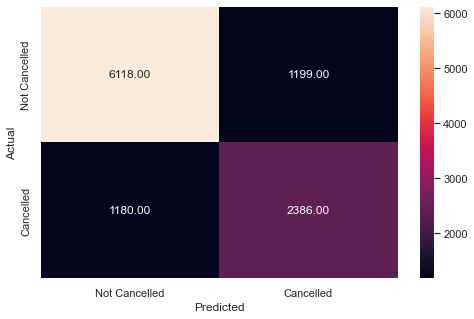

In [184]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

In [185]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [191]:
# Remove _________ and complete the code

svm = SVC(kernel='rbf',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X_train_scaled,y_train)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     17073
           1       0.00      0.00      0.00      8319

    accuracy                           0.67     25392
   macro avg       0.34      0.50      0.40     25392
weighted avg       0.45      0.67      0.54     25392



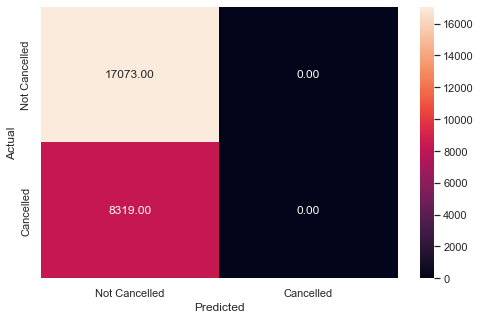

In [192]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict(X_train)
metrics_score(y_train, y_pred_train_svm)


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



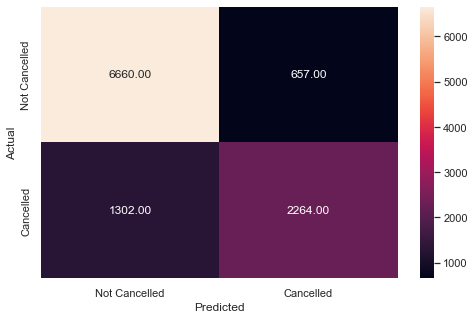

In [193]:
# Remove _________ and complete the code

y_pred_test = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test)


              precision    recall  f1-score   support

           0       0.67      1.00      0.80      7317
           1       0.00      0.00      0.00      3566

    accuracy                           0.67     10883
   macro avg       0.34      0.50      0.40     10883
weighted avg       0.45      0.67      0.54     10883



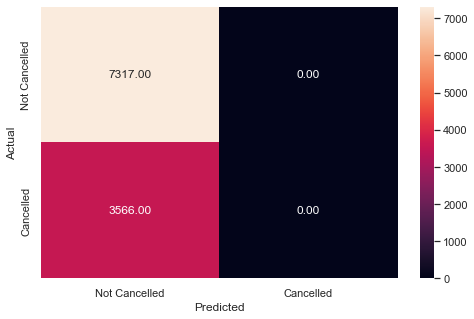

In [130]:

y_pred_test = svm_rbf.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

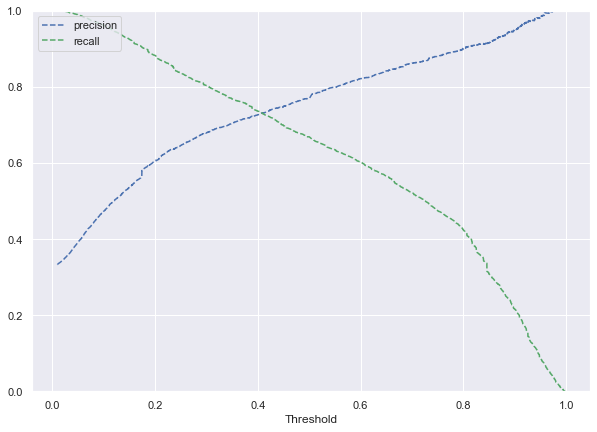

In [132]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [139]:
optimal_threshold_svm=0.41

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     17073
           1       0.73      0.73      0.73      8319

    accuracy                           0.82     25392
   macro avg       0.80      0.80      0.80     25392
weighted avg       0.82      0.82      0.82     25392



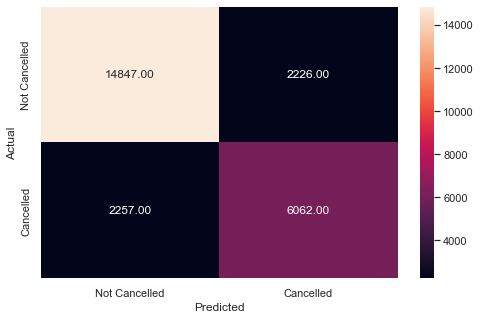

In [195]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7317
           1       0.72      0.72      0.72      3566

    accuracy                           0.81     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.81      0.81      0.81     10883



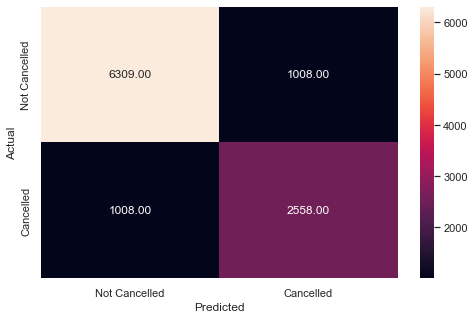

In [196]:
# Remove _________ and complete the code

y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

In [197]:
# Remove _________ and complete the code

model_dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17073
           1       0.98      1.00      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



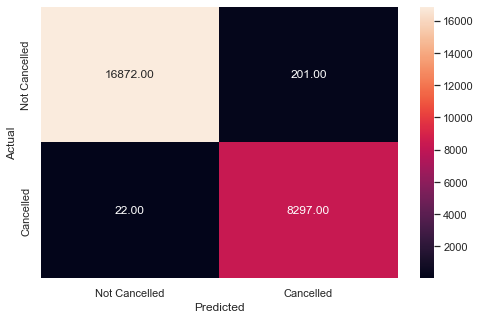

In [198]:
# Remove _________ and complete the code

# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.79      0.78      0.79      3566

    accuracy                           0.86     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883



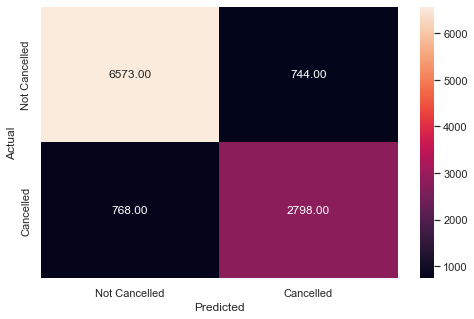

In [199]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

In [200]:
# Remove _________ and complete the code

# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv = 10)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=4,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78     17073
           1       0.57      0.85      0.68      8319

    accuracy                           0.74     25392
   macro avg       0.74      0.77      0.73     25392
weighted avg       0.79      0.74      0.75     25392



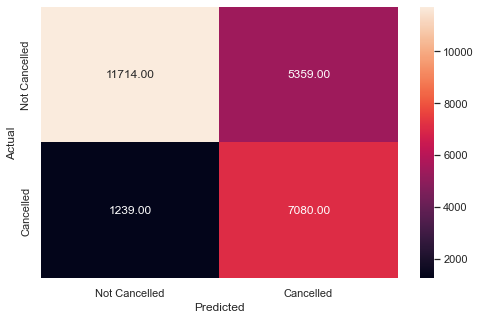

In [201]:
# Remove _________ and complete the code

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)

metrics_score(y_train, dt_tuned)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78     17073
           1       0.57      0.85      0.68      8319

    accuracy                           0.74     25392
   macro avg       0.74      0.77      0.73     25392
weighted avg       0.79      0.74      0.75     25392



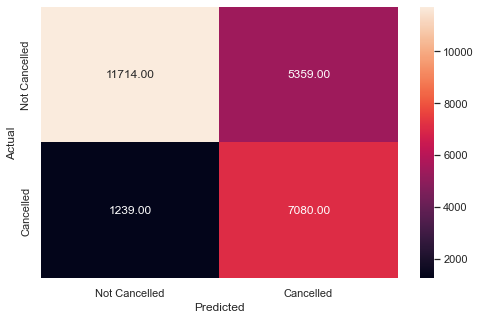

In [202]:
# Remove _________ and complete the code

# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_train)
metrics_score(y_train, y_pred_tuned)

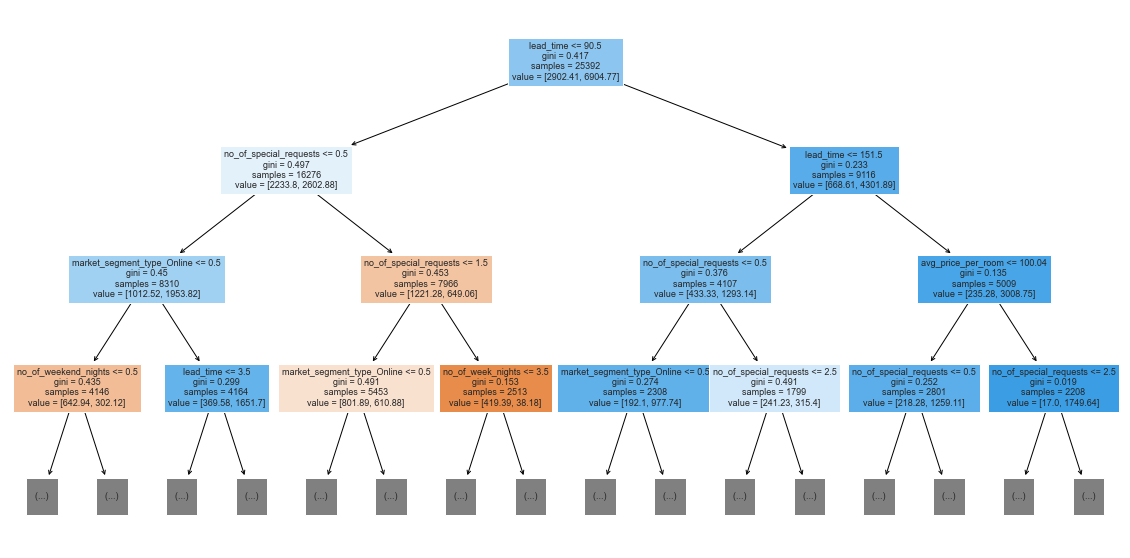

In [203]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

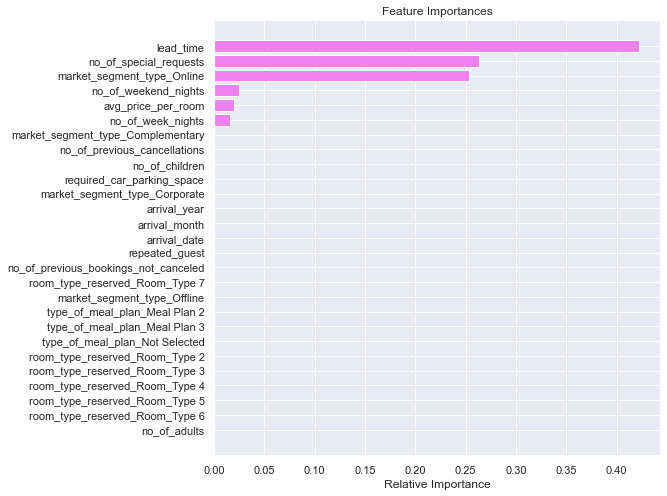

In [153]:
# Remove _________ and complete the code

# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [154]:
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



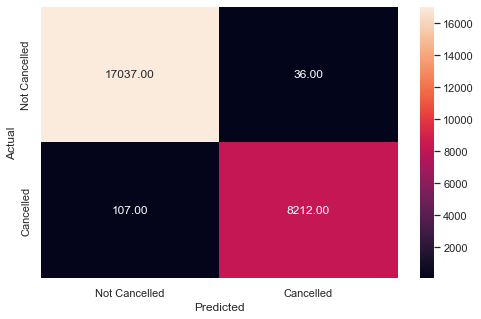

In [155]:
# Remove _________ and complete the code

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



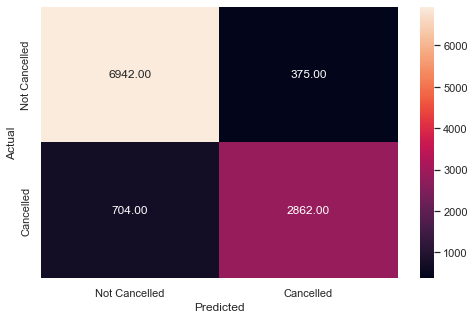

In [156]:
# Remove _________ and complete the code
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Importance'>

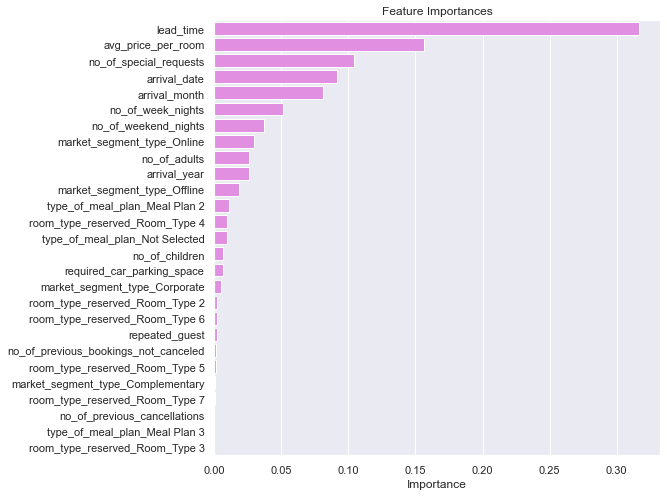

In [157]:


importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(importance_df.Importance, importance_df.index,color="violet")

In [ ]:
'''
Question 8: Conclude ANY FOUR key takeaways for business recommendations (4 Marks)

Based on my analysis we can draw the following colcusions 
1. We can see based on out decision tree that the most important features in a calcellation would be the lead time,
price and lastly the number of specal requests these would be the most common reasons for a cancellation 

2. The best way to avoid calcellations would be to make a policy regarding fees and bookings. 
In short of a customer wants to cancel a booking within 1 week of their stay they have to pay a fee 

3. We can also see that cancelations also occur when there is a problem while guests are at the hotel
In order to fix this we should make a policy to state that you are allowed to have a set number of requests 
for the hotel staff - as per the importance of the features 

4. THe last recommendation I would have for any business would be to advertise an online 
service which is top of the line. Based on the random forest model it is a fairly important feature 